In [13]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../src")))

project_root = os.path.abspath(os.path.join(os.getcwd(), '/Users/rohanjairam/projects/financial-fraud-anomaly-detector'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("/Users/rohanjairam/projects/financial-fraud-anomaly-detector/data/updated_creditcard.csv")

In [16]:
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [17]:
from src.anomaly_detection import train_isolation_forest, detect_anomalies, evaluate_model

In [18]:
iso_forest_model = train_isolation_forest(X_train)
y_pred, anomaly_scores = detect_anomalies(iso_forest_model, X_test)

In [19]:
# Map predictions: IsolationForest returns (-1 for anomaly, 1 for normal)
# Convert for comparison with binary labels (1 = fraud, 0 = normal)
y_pred_mapped = (y_pred == -1).astype(int)
evaluate_model(y_test, y_pred_mapped)

[[56772    92]
 [   80    18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.16      0.18      0.17        98

    accuracy                           1.00     56962
   macro avg       0.58      0.59      0.59     56962
weighted avg       1.00      1.00      1.00     56962



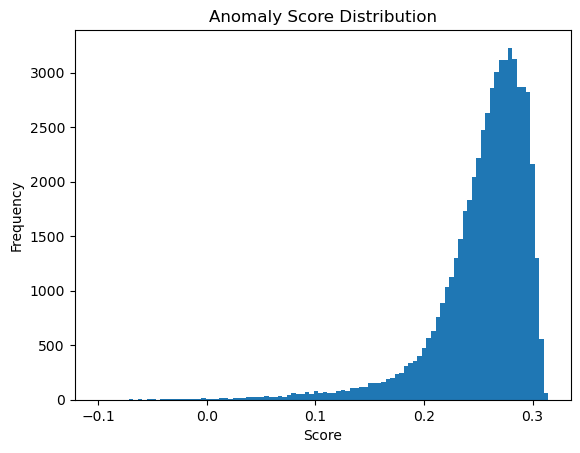

In [20]:
import matplotlib.pyplot as plt

plt.hist(anomaly_scores, bins=100)
plt.title("Anomaly Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [25]:
cwd = os.getcwd()

In [26]:
print(cwd)

/Users/rohanjairam/projects/financial-fraud-anomaly-detector/notebooks


In [27]:
print(project_root)

/Users/rohanjairam/projects/financial-fraud-anomaly-detector


In [30]:
import os
import joblib

In [31]:
os.makedirs("models", exist_ok=True)

In [32]:
joblib.dump(iso_forest_model, "models/isolation_forest_model.joblib")

['models/isolation_forest_model.joblib']